In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [5]:
#IoT Fridge
data = pd.read_csv('/content/drive/MyDrive/ToN_IoT_dataset/Processed_IoT_dataset/IoT_Fridge.csv')



In [6]:
data



,date,time,fridge_temperature,temp_condition,label,type
0,31-Mar-19,12:36:52,13.10,high,0,normal
1,31-Mar-19,12:36:53,8.65,high,0,normal
2,31-Mar-19,12:36:54,2.00,low,0,normal
3,31-Mar-19,12:36:55,4.80,low,0,normal
4,31-Mar-19,12:36:56,10.70,high,0,normal
...,...,...,...,...,...,...
587071,27-Apr-19,12:41:17,4.00,low,0,normal
587072,27-Apr-19,12:41:17,6.05,high,0,normal
587073,27-Apr-19,12:41:17,12.80,high,0,normal
587074,27-Apr-19,12:41:18,6.50,high,0,normal


In [7]:
print(data.shape)
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

(587076, 6)
No of rows 587076
No of columns 6


In [8]:
inputs = data.drop(['label','type'],axis = 'columns')
target_var = data['label']


In [9]:
inputs

,date,time,fridge_temperature,temp_condition
0,31-Mar-19,12:36:52,13.10,high
1,31-Mar-19,12:36:53,8.65,high
2,31-Mar-19,12:36:54,2.00,low
3,31-Mar-19,12:36:55,4.80,low
4,31-Mar-19,12:36:56,10.70,high
...,...,...,...,...
587071,27-Apr-19,12:41:17,4.00,low
587072,27-Apr-19,12:41:17,6.05,high
587073,27-Apr-19,12:41:17,12.80,high
587074,27-Apr-19,12:41:18,6.50,high


In [10]:
le_date = LabelEncoder()
le_time = LabelEncoder()
le_fridge_temperature = LabelEncoder()
le_temp_condition = LabelEncoder()

In [11]:
inputs['date_n'] = le_date.fit_transform(inputs['date'])
inputs['time_n'] = le_time.fit_transform(inputs['time'])
inputs['fridge_temperature_n'] = le_fridge_temperature.fit_transform(inputs['fridge_temperature'])
inputs['temp_condition_n'] = le_temp_condition.fit_transform(inputs['temp_condition'])
inputs.head()


,date,time,fridge_temperature,temp_condition,date_n,time_n,fridge_temperature_n,temp_condition_n
0,31-Mar-19,12:36:52,13.10,high,11,10707,144,1
1,31-Mar-19,12:36:53,8.65,high,11,10708,94,1
2,31-Mar-19,12:36:54,2.00,low,11,10709,7,4
3,31-Mar-19,12:36:55,4.80,low,11,10710,40,4
4,31-Mar-19,12:36:56,10.70,high,11,10711,117,1


In [12]:
new_inputs = inputs.drop(['date','time','fridge_temperature','temp_condition'],axis = 'columns')
new_inputs.head()

,date_n,time_n,fridge_temperature_n,temp_condition_n
0,11,10707,144,1
1,11,10708,94,1
2,11,10709,7,4
3,11,10710,40,4
4,11,10711,117,1


In [13]:
#split dataset in features and target variable
feature_cols = ['date_n', 'time_n', 'fridge_temperature_n', 'temp_condition_n']
X = new_inputs[feature_cols] # Features
y = target_var # Target variable

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9957018674449106


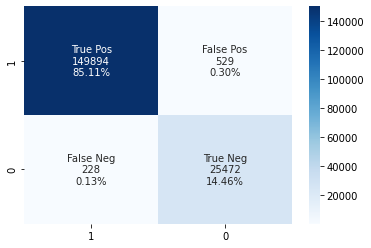

In [17]:

conf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])
plt.show()

In [18]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    150423
           1       0.98      0.99      0.99     25700

    accuracy                           1.00    176123
   macro avg       0.99      0.99      0.99    176123
weighted avg       1.00      1.00      1.00    176123



In [19]:
#IoT GPS tracker
data = pd.read_csv('/content/drive/MyDrive/ToN_IoT_dataset/Processed_IoT_dataset/IoT_GPS_Tracker.csv')

In [20]:
data

,date,time,latitude,longitude,label,type
0,31-Mar-19,12:36:52,0.000000,10.000000,0,normal
1,31-Mar-19,12:36:53,0.000000,10.000000,0,normal
2,31-Mar-19,12:36:54,0.000000,10.000000,0,normal
3,31-Mar-19,12:36:55,0.000000,10.000000,0,normal
4,31-Mar-19,12:36:56,0.000000,10.000000,0,normal
...,...,...,...,...,...,...
595681,27-Apr-19,12:41:16,182.523268,190.867134,0,normal
595682,27-Apr-19,12:41:16,183.122818,191.159551,0,normal
595683,27-Apr-19,12:41:17,247.820755,261.905963,0,normal
595684,27-Apr-19,12:41:17,246.000741,264.091992,0,normal


In [21]:
print(data.shape)
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

(595686, 6)
No of rows 595686
No of columns 6


In [22]:
inputs = data.drop(['label','type'],axis = 'columns')
target_var = data['label']
inputs


,date,time,latitude,longitude
0,31-Mar-19,12:36:52,0.000000,10.000000
1,31-Mar-19,12:36:53,0.000000,10.000000
2,31-Mar-19,12:36:54,0.000000,10.000000
3,31-Mar-19,12:36:55,0.000000,10.000000
4,31-Mar-19,12:36:56,0.000000,10.000000
...,...,...,...,...
595681,27-Apr-19,12:41:16,182.523268,190.867134
595682,27-Apr-19,12:41:16,183.122818,191.159551
595683,27-Apr-19,12:41:17,247.820755,261.905963
595684,27-Apr-19,12:41:17,246.000741,264.091992


In [23]:
le_date = LabelEncoder()
le_time = LabelEncoder()
le_latitude = LabelEncoder()
le_longitude = LabelEncoder()

In [24]:
inputs['date_n'] = le_date.fit_transform(inputs['date'])
inputs['time_n'] = le_time.fit_transform(inputs['time'])
inputs['latitude_n'] = le_latitude.fit_transform(inputs['latitude'])
inputs['longitude_n'] = le_longitude.fit_transform(inputs['longitude'])
inputs.head()

,date,time,latitude,longitude,date_n,time_n,latitude_n,longitude_n
0,31-Mar-19,12:36:52,0.0,10.0,11,84384,0,0
1,31-Mar-19,12:36:53,0.0,10.0,11,84385,0,0
2,31-Mar-19,12:36:54,0.0,10.0,11,84386,0,0
3,31-Mar-19,12:36:55,0.0,10.0,11,84387,0,0
4,31-Mar-19,12:36:56,0.0,10.0,11,84388,0,0


In [25]:
new_inputs = inputs.drop(['date','time','latitude','longitude'],axis = 'columns')
new_inputs.head()

,date_n,time_n,latitude_n,longitude_n
0,11,84384,0,0
1,11,84385,0,0
2,11,84386,0,0
3,11,84387,0,0
4,11,84388,0,0


In [26]:
#split dataset in features and target variable
feature_cols = ['date_n', 'time_n', 'latitude_n', 'longitude_n']
X = new_inputs[feature_cols] # Features
y = target_var # Target variable

In [27]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9954282452743612


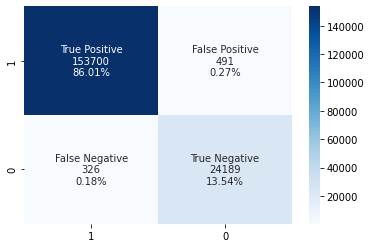

In [30]:

conf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])
plt.show()

In [31]:


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154191
           1       0.98      0.99      0.98     24515

    accuracy                           1.00    178706
   macro avg       0.99      0.99      0.99    178706
weighted avg       1.00      1.00      1.00    178706



In [32]:
#IoT Garage Door
data = pd.read_csv('/content/drive/MyDrive/ToN_IoT_dataset/Processed_IoT_dataset/IoT_Garage_Door.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
data

,date,time,door_state,sphone_signal,label,type
0,1-Apr-19,20:53:44,open,true,0,normal
1,1-Apr-19,20:53:49,closed,false,0,normal
2,1-Apr-19,20:53:49,open,true,0,normal
3,1-Apr-19,20:53:54,closed,false,0,normal
4,1-Apr-19,20:53:54,open,true,0,normal
...,...,...,...,...,...,...
591441,27-Apr-19,11:03:21,closed,0.0,0,normal
591442,27-Apr-19,11:03:21,closed,0.0,0,normal
591443,27-Apr-19,11:03:21,closed,0.0,0,normal
591444,27-Apr-19,11:03:22,closed,0.0,0,normal


In [34]:
print(data.shape)
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

(591446, 6)
No of rows 591446
No of columns 6


In [35]:
inputs = data.drop(['label','type'],axis = 'columns')
target_var = data['label']
inputs

,date,time,door_state,sphone_signal
0,1-Apr-19,20:53:44,open,true
1,1-Apr-19,20:53:49,closed,false
2,1-Apr-19,20:53:49,open,true
3,1-Apr-19,20:53:54,closed,false
4,1-Apr-19,20:53:54,open,true
...,...,...,...,...
591441,27-Apr-19,11:03:21,closed,0.0
591442,27-Apr-19,11:03:21,closed,0.0
591443,27-Apr-19,11:03:21,closed,0.0
591444,27-Apr-19,11:03:22,closed,0.0


In [36]:
le_date = LabelEncoder()
le_time = LabelEncoder()
le_door_state = LabelEncoder()
le_sphone_signal = LabelEncoder()

In [37]:
inputs['date_n'] = le_date.fit_transform(inputs['date'].astype('str'))
inputs['time_n'] = le_time.fit_transform(inputs['time'].astype('str'))
inputs['door_state_n'] = le_door_state.fit_transform(inputs['door_state'].astype('str'))
inputs['sphone_signal_n'] = le_sphone_signal.fit_transform(inputs['sphone_signal'].astype('str'))
inputs.head()

,date,time,door_state,sphone_signal,date_n,time_n,door_state_n,sphone_signal_n
0,1-Apr-19,20:53:44,open,true,0,28286,2,6
1,1-Apr-19,20:53:49,closed,false,0,28287,0,4
2,1-Apr-19,20:53:49,open,true,0,28287,2,6
3,1-Apr-19,20:53:54,closed,false,0,28288,0,4
4,1-Apr-19,20:53:54,open,true,0,28288,2,6


In [38]:
new_inputs = inputs.drop(['date','time','door_state','sphone_signal'],axis = 'columns')
new_inputs.head()

,date_n,time_n,door_state_n,sphone_signal_n
0,0,28286,2,6
1,0,28287,0,4
2,0,28287,2,6
3,0,28288,0,4
4,0,28288,2,6


In [39]:
#split dataset in features and target variable
feature_cols = ['date_n', 'time_n', 'door_state_n', 'sphone_signal_n']
X = new_inputs[feature_cols] # Features
y = target_var # Target variable

In [40]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [41]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9957110813034706


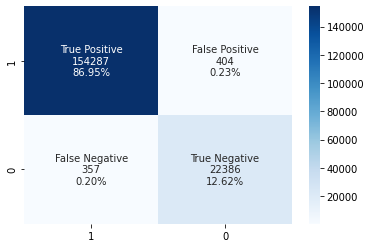

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154691
           1       0.98      0.98      0.98     22743

    accuracy                           1.00    177434
   macro avg       0.99      0.99      0.99    177434
weighted avg       1.00      1.00      1.00    177434



In [45]:
#IoT Modbus
data = pd.read_csv('/content/drive/MyDrive/ToN_IoT_dataset/Processed_IoT_dataset/IoT_Modbus.csv')

In [46]:
data

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal
...,...,...,...,...,...,...,...,...
287189,29-Apr-19,23:59:10,22798,40857,14335,58610,0,normal
287190,29-Apr-19,23:59:22,15838,54368,63613,45660,0,normal
287191,29-Apr-19,23:59:26,28674,60221,3792,17705,0,normal
287192,29-Apr-19,23:59:32,28674,60221,3792,17705,0,normal


In [47]:
print(data.shape)
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

(287194, 8)
No of rows 287194
No of columns 8


In [48]:
inputs = data.drop(['label','type'],axis = 'columns')
target_var = data['label']
inputs

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
0,31-Mar-19,12:36:55,53287,1463,33518,23014
1,31-Mar-19,12:36:58,41029,55891,26004,50645
2,31-Mar-19,12:36:58,41029,55891,26004,50645
3,31-Mar-19,12:37:00,64661,40232,33460,44046
4,31-Mar-19,12:37:01,64661,40232,33460,44046
...,...,...,...,...,...,...
287189,29-Apr-19,23:59:10,22798,40857,14335,58610
287190,29-Apr-19,23:59:22,15838,54368,63613,45660
287191,29-Apr-19,23:59:26,28674,60221,3792,17705
287192,29-Apr-19,23:59:32,28674,60221,3792,17705


In [49]:
le_date = LabelEncoder()
le_time = LabelEncoder()
le_FC1_Read_Input_Register = LabelEncoder()
le_FC2_Read_Discrete_Value = LabelEncoder()
le_FC3_Read_Holding_Register = LabelEncoder()
le_FC4_Read_Coil = LabelEncoder()

In [50]:
inputs['date_n'] = le_date.fit_transform(inputs['date'])
inputs['time_n'] = le_time.fit_transform(inputs['time'])
inputs['FC1_Read_Input_Register_n'] = le_FC1_Read_Input_Register.fit_transform(inputs['FC1_Read_Input_Register'])
inputs['FC2_Read_Discrete_Value_n'] = le_FC2_Read_Discrete_Value.fit_transform(inputs['FC2_Read_Discrete_Value'])
inputs['FC3_Read_Holding_Register_n'] = le_FC3_Read_Holding_Register.fit_transform(inputs['FC3_Read_Holding_Register'])
inputs['FC4_Read_Coil_n'] = le_FC4_Read_Coil.fit_transform(inputs['FC4_Read_Coil'])
inputs.head()

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,date_n,time_n,FC1_Read_Input_Register_n,FC2_Read_Discrete_Value_n,FC3_Read_Holding_Register_n,FC4_Read_Coil_n
0,31-Mar-19,12:36:55,53287,1463,33518,23014,11,30945,43655,1191,27347,18833
1,31-Mar-19,12:36:58,41029,55891,26004,50645,11,30948,33605,45731,21194,41548
2,31-Mar-19,12:36:58,41029,55891,26004,50645,11,78022,33605,45731,21194,41548
3,31-Mar-19,12:37:00,64661,40232,33460,44046,11,78024,52964,32970,27302,36114
4,31-Mar-19,12:37:01,64661,40232,33460,44046,11,78025,52964,32970,27302,36114


In [51]:
new_inputs = inputs.drop(['date','time','FC1_Read_Input_Register','FC2_Read_Discrete_Value','FC3_Read_Holding_Register','FC4_Read_Coil'],axis = 'columns')
new_inputs.head()

,date_n,time_n,FC1_Read_Input_Register_n,FC2_Read_Discrete_Value_n,FC3_Read_Holding_Register_n,FC4_Read_Coil_n
0,11,30945,43655,1191,27347,18833
1,11,30948,33605,45731,21194,41548
2,11,78022,33605,45731,21194,41548
3,11,78024,52964,32970,27302,36114
4,11,78025,52964,32970,27302,36114


In [52]:
#split dataset in features and target variable
feature_cols = ['date_n','time_n','FC1_Read_Input_Register_n','FC2_Read_Discrete_Value_n','FC3_Read_Holding_Register_n','FC4_Read_Coil_n']
X = new_inputs[feature_cols] # Features
y = target_var # Target variable

In [53]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [54]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.992595085829687


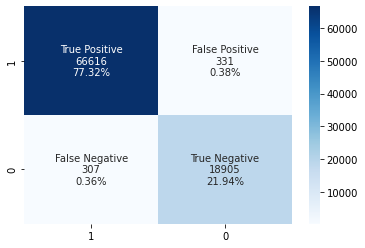

In [56]:

conf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])
plt.show()

In [57]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66947
           1       0.98      0.98      0.98     19212

    accuracy                           0.99     86159
   macro avg       0.99      0.99      0.99     86159
weighted avg       0.99      0.99      0.99     86159



In [58]:
#IoT Motion Light
data = pd.read_csv('/content/drive/MyDrive/ToN_IoT_dataset/Processed_IoT_dataset/IoT_Motion_Light.csv')

In [59]:
data

,date,time,motion_status,light_status,label,type
0,31-Mar-19,12:36:52,1,on,0,normal
1,31-Mar-19,12:36:53,0,off,0,normal
2,31-Mar-19,12:36:54,0,off,0,normal
3,31-Mar-19,12:36:55,1,on,0,normal
4,31-Mar-19,12:36:56,1,on,0,normal
...,...,...,...,...,...,...
452257,27-Apr-19,12:41:14,0,off,0,normal
452258,27-Apr-19,12:41:18,0,off,0,normal
452259,27-Apr-19,12:41:19,1,on,0,normal
452260,27-Apr-19,12:41:19,1,on,0,normal


In [60]:
print(data.shape)
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

(452262, 6)
No of rows 452262
No of columns 6


In [61]:
inputs = data.drop(['label','type'],axis = 'columns')
target_var = data['label']
inputs

,date,time,motion_status,light_status
0,31-Mar-19,12:36:52,1,on
1,31-Mar-19,12:36:53,0,off
2,31-Mar-19,12:36:54,0,off
3,31-Mar-19,12:36:55,1,on
4,31-Mar-19,12:36:56,1,on
...,...,...,...,...
452257,27-Apr-19,12:41:14,0,off
452258,27-Apr-19,12:41:18,0,off
452259,27-Apr-19,12:41:19,1,on
452260,27-Apr-19,12:41:19,1,on


In [62]:
le_date = LabelEncoder()
le_time = LabelEncoder()
le_motion_status = LabelEncoder()
le_light_status = LabelEncoder()


In [63]:
inputs['date_n'] = le_date.fit_transform(inputs['date'])
inputs['time_n'] = le_time.fit_transform(inputs['time'])
inputs['motion_status_n'] = le_motion_status.fit_transform(inputs['motion_status'])
inputs['light_status_n'] = le_light_status.fit_transform(inputs['light_status'])

inputs.head()

,date,time,motion_status,light_status,date_n,time_n,motion_status_n,light_status_n
0,31-Mar-19,12:36:52,1,on,10,79113,1,1
1,31-Mar-19,12:36:53,0,off,10,79114,0,0
2,31-Mar-19,12:36:54,0,off,10,79115,0,0
3,31-Mar-19,12:36:55,1,on,10,79116,1,1
4,31-Mar-19,12:36:56,1,on,10,79117,1,1


In [64]:
new_inputs = inputs.drop(['date','time','motion_status','light_status'],axis = 'columns')
new_inputs.head()

,date_n,time_n,motion_status_n,light_status_n
0,10,79113,1,1
1,10,79114,0,0
2,10,79115,0,0
3,10,79116,1,1
4,10,79117,1,1


In [65]:
#split dataset in features and target variable
feature_cols = ['date_n','time_n','motion_status_n','light_status_n']
X = new_inputs[feature_cols] # Features
y = target_var # Target variable

In [66]:
 #Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [67]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9950102816205898


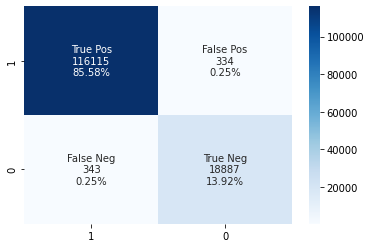

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])
plt.show()

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116449
           1       0.98      0.98      0.98     19230

    accuracy                           1.00    135679
   macro avg       0.99      0.99      0.99    135679
weighted avg       1.00      1.00      1.00    135679



In [71]:
#IoT Thermostat
data = pd.read_csv('/content/drive/MyDrive/ToN_IoT_dataset/Processed_IoT_dataset/IoT_Thermostat.csv')

In [72]:
data

,date,time,current_temperature,thermostat_status,label,type
0,31-Mar-19,12:36:52,25.000000,0,0,normal
1,31-Mar-19,12:36:53,25.000000,0,0,normal
2,31-Mar-19,12:36:54,25.000000,0,0,normal
3,31-Mar-19,12:36:55,25.000000,0,0,normal
4,31-Mar-19,12:36:56,25.000000,0,0,normal
...,...,...,...,...,...,...
442223,27-Apr-19,12:41:14,29.804525,1,0,normal
442224,27-Apr-19,12:41:18,25.824332,1,0,normal
442225,27-Apr-19,12:41:19,27.248819,1,0,normal
442226,27-Apr-19,12:41:19,29.739201,1,0,normal


In [73]:
print(data.shape)
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

(442228, 6)
No of rows 442228
No of columns 6


In [ ]:
data = data.dropna(axis = 0,subset=['date', 'time'])

In [74]:
inputs = data.drop(['label','type'],axis = 'columns')
target_var = data['label']
inputs

,date,time,current_temperature,thermostat_status
0,31-Mar-19,12:36:52,25.000000,0
1,31-Mar-19,12:36:53,25.000000,0
2,31-Mar-19,12:36:54,25.000000,0
3,31-Mar-19,12:36:55,25.000000,0
4,31-Mar-19,12:36:56,25.000000,0
...,...,...,...,...
442223,27-Apr-19,12:41:14,29.804525,1
442224,27-Apr-19,12:41:18,25.824332,1
442225,27-Apr-19,12:41:19,27.248819,1
442226,27-Apr-19,12:41:19,29.739201,1


In [75]:
le_date = LabelEncoder()

le_time = LabelEncoder()
le_current_temperature = LabelEncoder()
le_thermostat_status = LabelEncoder()


In [76]:
inputs['date_n'] = le_date.fit_transform(inputs['date'].astype('str'))
inputs['time_n'] = le_time.fit_transform(inputs['time'].astype('str'))
inputs['current_temperature_n'] = le_current_temperature.fit_transform(inputs['current_temperature'].astype('str'))
inputs['thermostat_status_n'] = le_thermostat_status.fit_transform(inputs['thermostat_status'].astype('str'))

inputs.head()

,date,time,current_temperature,thermostat_status,date_n,time_n,current_temperature_n,thermostat_status_n
0,31-Mar-19,12:36:52,25.0,0,10,79408,1,0
1,31-Mar-19,12:36:53,25.0,0,10,79409,1,0
2,31-Mar-19,12:36:54,25.0,0,10,79410,1,0
3,31-Mar-19,12:36:55,25.0,0,10,79411,1,0
4,31-Mar-19,12:36:56,25.0,0,10,79412,1,0


In [77]:
new_inputs = inputs.drop(['date','time','current_temperature','thermostat_status'],axis = 'columns')
new_inputs.head()

,date_n,time_n,current_temperature_n,thermostat_status_n
0,10,79408,1,0
1,10,79409,1,0
2,10,79410,1,0
3,10,79411,1,0
4,10,79412,1,0


In [78]:
#split dataset in features and target variable
feature_cols = ['date_n','time_n','current_temperature_n','thermostat_status_n']
X = new_inputs[feature_cols] # Features
y = target_var # Target variable

In [79]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [80]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [81]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9967136256397501


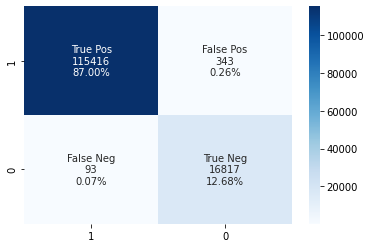

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])
plt.show()

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115759
           1       0.98      0.99      0.99     16910

    accuracy                           1.00    132669
   macro avg       0.99      1.00      0.99    132669
weighted avg       1.00      1.00      1.00    132669



In [84]:
#IoT Weather
data = pd.read_csv('/content/drive/MyDrive/ToN_IoT_dataset/Processed_IoT_dataset/IoT_Weather.csv')

In [85]:
data

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035000,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035000,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035000,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035000,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035000,40.001059,0,normal
...,...,...,...,...,...,...,...
650237,27-Apr-19,12:41:17,40.384291,9.049059,93.094490,0,normal
650238,27-Apr-19,12:41:18,47.240113,-5.782022,28.146511,0,normal
650239,27-Apr-19,12:41:18,23.540606,0.913648,30.478316,0,normal
650240,27-Apr-19,12:41:18,46.016150,3.493588,73.328413,0,normal


In [86]:
print(data.shape)
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

(650242, 7)
No of rows 650242
No of columns 7


In [87]:
inputs = data.drop(['label','type'],axis = 'columns')
target_var = data['label']
inputs


,date,time,temperature,pressure,humidity
0,31-Mar-19,12:36:52,31.788508,1.035000,32.036579
1,31-Mar-19,12:36:53,41.630997,1.035000,30.886165
2,31-Mar-19,12:36:54,42.256959,1.035000,19.755908
3,31-Mar-19,12:36:55,49.116581,1.035000,78.949621
4,31-Mar-19,12:36:56,24.017085,1.035000,40.001059
...,...,...,...,...,...
650237,27-Apr-19,12:41:17,40.384291,9.049059,93.094490
650238,27-Apr-19,12:41:18,47.240113,-5.782022,28.146511
650239,27-Apr-19,12:41:18,23.540606,0.913648,30.478316
650240,27-Apr-19,12:41:18,46.016150,3.493588,73.328413


In [88]:
le_date = LabelEncoder()
le_time = LabelEncoder()
le_temperature = LabelEncoder()
le_pressure = LabelEncoder()
le_humidity = LabelEncoder()

In [89]:
inputs['date_n'] = le_date.fit_transform(inputs['date'])
inputs['time_n'] = le_time.fit_transform(inputs['time'])
inputs['temperature_n'] = le_temperature.fit_transform(inputs['temperature'])
inputs['pressure_n'] = le_pressure.fit_transform(inputs['pressure'])
inputs['humidity_n'] = le_humidity.fit_transform(inputs['humidity'])
inputs.head()

,date,time,temperature,pressure,humidity,date_n,time_n,temperature_n,pressure_n,humidity_n
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,11,77572,187945,32817,29574
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,11,77573,388149,32817,28321
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,11,77574,402748,32817,16911
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,11,77575,562045,32817,83485
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,11,77576,53759,32817,38182


In [90]:
new_inputs = inputs.drop(['date','time','temperature','pressure','humidity'],axis = 'columns')
new_inputs.head()

,date_n,time_n,temperature_n,pressure_n,humidity_n
0,11,77572,187945,32817,29574
1,11,77573,388149,32817,28321
2,11,77574,402748,32817,16911
3,11,77575,562045,32817,83485
4,11,77576,53759,32817,38182


In [91]:
#split dataset in features and target variable
feature_cols = ['date_n', 'time_n', 'temperature_n', 'pressure_n', 'humidity_n']
X = new_inputs[feature_cols] # Features
y = target_var # Target variable

In [92]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # 70% training and 30% test

In [93]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [94]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9954683631255992


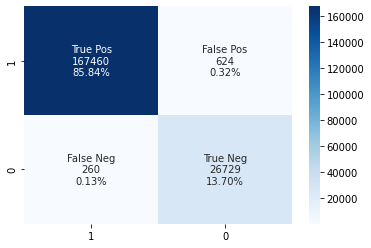

In [95]:
conf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])
plt.show()

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168084
           1       0.98      0.99      0.98     26989

    accuracy                           1.00    195073
   macro avg       0.99      0.99      0.99    195073
weighted avg       1.00      1.00      1.00    195073

